In [1]:
from FEM_solution import FEM_solution
import matplotlib.pyplot as plt
import numpy as np 
from domains import ScattererShape, ScattererType

NDOF: 9910
NDOF: 14090


(np.float64(-1.5866629563584813),
 np.float64(1.5866629563584813),
 np.float64(-0.005050505050505051),
 np.float64(1.005050505050505))

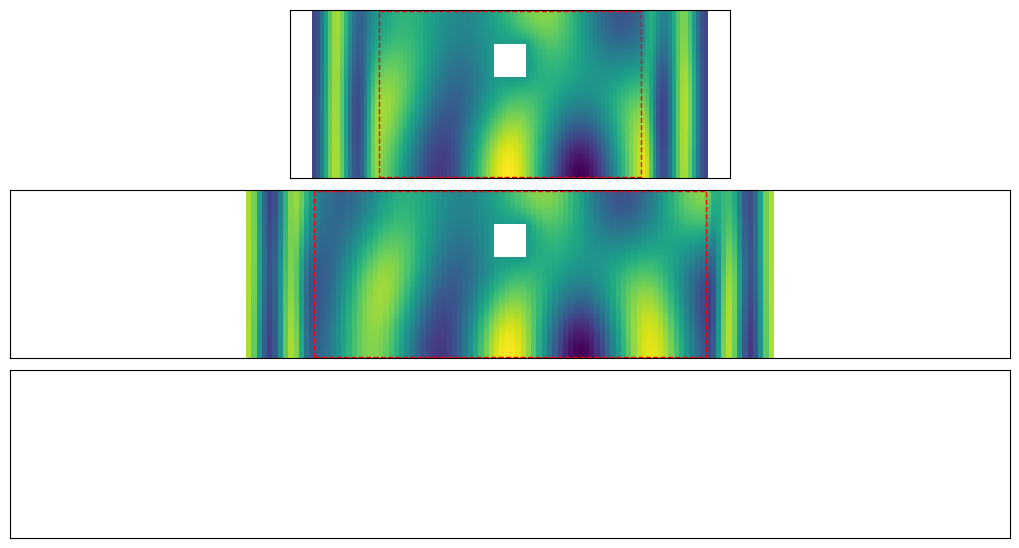

In [2]:
spacing = 0.02
pad = 0.0
plot_h = 0.28


from matplotlib.patches import Rectangle 
H = 1
k_e = 8.
R = 2*np.pi/k_e
delta_PML = 0.5*R
rad = 0.2

Ny = 100
Nx = int((R+delta_PML)/H)*Ny

x_coords = np.linspace(-R - delta_PML,R+delta_PML,Nx)
y_coords = np.linspace(0,H,Ny)
X1, Y1 = np.meshgrid(x_coords,y_coords)

alpha = 0.5*(4+2*1j)
u_tot1 = FEM_solution( R = R,
                            H = H, 
                            params =  {"c" : np.array([0., 0.7*H]), "width" : 0.2*H, "height" : 0.2*H},
                            scatterer_shape = ScattererShape.RECTANGLE,
                            scatterer_type = ScattererType.SOUND_SOFT,
                            n = 0,
                            k_e = 8.,
                            k_i = 16., 
                            polynomial_order = 5,
                            X=X1,
                            Y=Y1,
                            alpha=alpha,
                            delta_PML=delta_PML)


R2 = 1.5*R
delta_PML = 0.5*R
rad = 0.2

Ny = 100
Nx = int((R2+delta_PML)/H)*Ny

x_coords = np.linspace(-R2 - delta_PML,R2+delta_PML,Nx)
y_coords = np.linspace(0,H,Ny)
X2, Y2 = np.meshgrid(x_coords,y_coords)

alpha = 0.5*(4+2*1j)
u_tot2 = FEM_solution( R = R2,
                            H = H, 
                            params =  {"c" : np.array([0., 0.7*H]), "width" : 0.2*H, "height" : 0.2*H},
                            scatterer_shape = ScattererShape.RECTANGLE,
                            scatterer_type = ScattererType.SOUND_SOFT,
                            n = 0,
                            k_e = 8.,
                            k_i = 16., 
                            polynomial_order = 5,
                            X=X2,
                            Y=Y2,
                            alpha=alpha,
                            delta_PML=delta_PML)






l1 = 1
l2 = 1
l3 = plot_h/H*(R2+delta_PML)

bottom_box = [ 0, 0, 1, plot_h]
center_box = [ 0, plot_h + spacing, 1, plot_h]

# center_box = [ 0.5 - l2/2, plot_h + spacing, l2, plot_h]
top_box = [ 0.5 - l3/2, pad + 2*(plot_h+spacing), l3, plot_h]

fig = plt.figure(figsize=(10,6))

bottom = plt.axes(bottom_box)
center = plt.axes(center_box)
top = plt.axes(top_box)


for ax in [bottom, center, top]:
    ax.set_xticks([])
    ax.set_yticks([])

top.pcolormesh(X1,Y1,np.real(u_tot1))
top.add_patch(Rectangle(xy=(-R,0), width=2*R, height=H, edgecolor='r', facecolor='None', linestyle='--'))
top.axis('equal')    

center.pcolormesh(X2,Y2,np.real(u_tot2))
center.add_patch(Rectangle(xy=(-R2,0), width=2*R2, height=H, edgecolor='r', facecolor='None', linestyle='--'))
center.axis('equal')    

center.pcolormesh(X2,Y2,np.real(u_tot2))
center.add_patch(Rectangle(xy=(-R2,0), width=2*R2, height=H, edgecolor='r', facecolor='None', linestyle='--'))
center.axis('equal')    

